In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from skimage import io, color, transform, feature, measure, data, draw, exposure, filters, graph, morphology, restoration, segmentation, transform, util
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
ci_path = 'plane_data/cropped_images/' # file path for cropped images for training
l_file = 'plane_data/plane_labels.csv' # file path and file name for csv with labels

In [5]:
def show_image(image, title="Image", cmap_type="gray") :
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

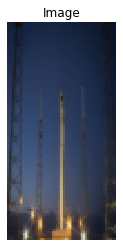

In [10]:
rocket = data.rocket()
dims = (120, 60)
downscaled = transform.resize(rocket, (dims[0], dims[1]))
show_image(downscaled)

In [12]:
hog_image = feature.hog(downscaled, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1, 1), visualize=True, multichannel=True)

In [13]:
print(hog_image)

(array([0.47213312, 0.32820906, 0.47213312, 0.34542935, 0.16782427,
       0.16516121, 0.22087355, 0.47213312, 0.12471095, 0.02403083,
       0.38611635, 0.4850364 , 0.4850364 , 0.4850364 , 0.35906738,
       0.00857612, 0.22048926, 0.        , 0.        , 0.        ,
       0.1108366 , 0.65817144, 0.65817144, 0.26966731, 0.53945572,
       0.20625021, 0.48313173, 0.26347878, 0.21314589, 0.09237583,
       0.1365068 , 0.53945572, 0.03453376, 0.02221695, 0.41324424,
       0.19615328, 0.51159869, 0.51159869, 0.51159869, 0.06218714,
       0.05417819, 0.        , 0.        , 0.        , 0.03649763,
       0.43359976, 0.63550134, 0.63550134, 0.54054132, 0.2955586 ,
       0.42010553, 0.16909231, 0.2058403 , 0.14854114, 0.24240402,
       0.54054132, 0.48531528, 0.35861081, 0.11369003, 0.14762004,
       0.07843989, 0.35204489, 0.48531528, 0.48531528, 0.57074269,
       0.00664828, 0.02708757, 0.07083475, 0.07115905, 0.10908362,
       0.57074269, 0.57074269, 0.54044602, 0.45329422, 0.2260